In [1]:
import torch
import torch
import torch.utils.data
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import TQDMProgressBar

from livecell_tracker.model_zoo.segmentation.sc_correction import CorrectSegNet
import numpy as np
import warnings
import tqdm
torch.manual_seed(237)


In [2]:
torch.cuda.is_available(), torch.cuda.current_device(), torch.cuda.device_count()

(True, 0, 1)

import torch
import torch
import torch.utils.data
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import TQDMProgressBar

from livecell_tracker.model_zoo.segmentation.sc_correction import CorrectSegNet
from livecell_tracker.model_zoo.segmentation.sc_correction_dataset import CorrectSegNetDataset
torch.manual_seed(237)

In [3]:
from pathlib import Path
import pandas as pd
# train_dir = Path("./notebook_results/a549_ccp_vim/train_data_v4/")
# test_dir = Path("./notebook_results/a549_ccp_vim/test_data_v4/")
# train_dir = Path("./notebook_results/a549_ccp_vim/train_data_v5/")
# test_dir = Path("./notebook_results/a549_ccp_vim/test_data_v5/")

train_dir = Path("./notebook_results/a549_ccp_vim/train_data_v6/")
test_dir = Path("./notebook_results/a549_ccp_vim/test_data_v6/")

train_csv = train_dir / "train_data.csv"
train_df = pd.read_csv(train_csv)
test_df = pd.read_csv(test_dir / "train_data.csv")
train_df[:2]

raw  \
0  notebook_results/a549_ccp_vim/train_data_v5/sy...   
1  notebook_results/a549_ccp_vim/train_data_v5/sy...   

                                                 seg  \
0  notebook_results/a549_ccp_vim/train_data_v5/sy...   
1  notebook_results/a549_ccp_vim/train_data_v5/sy...   

                                                  gt  \
0  notebook_results/a549_ccp_vim/train_data_v5/sy...   
1  notebook_results/a549_ccp_vim/train_data_v5/sy...   

                                             raw_seg     scale  \
0  notebook_results/a549_ccp_vim/train_data_v5/sy... -0.100000   
1  notebook_results/a549_ccp_vim/train_data_v5/sy... -0.088889   

                                       aug_diff_mask  \
0  notebook_results/a549_ccp_vim/train_data_v5/sy...   
1  notebook_results/a549_ccp_vim/train_data_v5/sy...   

                                       gt_label_mask  \
0  notebook_results/a549_ccp_vim/train_data_v5/sy...   
1  notebook_results/a549_ccp_vim/train_data_v5/sy...   

                                 raw_transformed_img             subdir  
0  notebook_results/a549_ccp_vim/train_data_v5/sy...  synthetic_overseg  
1  notebook_results/a549_ccp_vim/train_data_v5/sy...  synthetic_overseg

In [4]:
# ckpt = "/home/ke/LiveCellTracker-dev/notebooks/lightning_logs/version_68/checkpoints/epoch=197-step=44352.ckpt"
# ckpt = "/home/ke/LiveCellTracker-dev/notebooks/lightning_logs/version_67/checkpoints/epoch=440-step=98784.ckpt"
# ckpt = "/home/ke/LiveCellTracker-dev/notebooks/lightning_logs/version_67/epoch=499-step=112000.ckpt"

# # model 70 v0
# ckpt = r"/home/ke/LiveCellTracker-dev/notebooks/lightning_logs/version_70/checkpoints/epoch=999-step=224000.ckpt"
# # model 70 v1
# ckpt = r"/home/ke/LiveCellTracker-dev/notebooks/lightning_logs/version_70/checkpoints/epoch=999-step=224000-v1.ckpt"
# ckpt = r"/home/ke/LiveCellTracker-dev/notebooks/lightning_logs/version_71/checkpoints/epoch=999-step=224000.ckpt"
# # model 73
# ckpt = r"/home/ken67/LiveCellTracker-dev/notebooks/lightning_logs/version_73/epoch=421-step=94528.ckpt"

# # model 76
# ckpt = r"/home/ken67/LiveCellTracker-dev/notebooks/lightning_logs/version_85/checkpoints/epoch=999-step=224000.ckpt"
# ckpt = r"/home/ken67/LiveCellTracker-dev/notebooks/lightning_logs/version_310/checkpoints/epoch=88-step=1915636.ckpt"
ckpt = r"/home/ken67/LiveCellTracker-dev/notebooks/lightning_logs/version_601/checkpoints/epoch=99-step=1622400.ckpt"
model = CorrectSegNet.load_from_checkpoint(ckpt)
# model.load_state_dict(torch.load(ckpt)["state_dict"])
model.cuda();
model.eval();

/home/ken67/anaconda3/envs/livecell/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ken67/anaconda3/envs/livecell/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


>>> Using BCE loss with logits loss


In [5]:
from livecell_tracker.model_zoo.segmentation.eval_csn import assemble_dataset, assemble_train_test_dataset

# split_seed = 237
# dataset = assemble_dataset(train_df, apply_gt_seg_edt = model.apply_gt_seg_edt, exclude_raw_input_bg=model.exclude_raw_input_bg, input_type=model.input_type)
# train_sample_num = int(len(dataset) * 0.8)
# val_sample_num = len(dataset) - train_sample_num
# split_generator = torch.Generator().manual_seed(split_seed)
# train_dataset, val_dataset = torch.utils.data.random_split(
#     dataset, [train_sample_num, val_sample_num], generator=split_generator
# )

# test_dataset = assemble_dataset(test_df, apply_gt_seg_edt = model.apply_gt_seg_edt, exclude_raw_input_bg=model.exclude_raw_input_bg, input_type=model.input_type)
train_dataset, val_dataset, test_dataset, dataset = assemble_train_test_dataset(train_df, test_df, model)

input type: raw_aug_duplicate
if apply_gt_seg_edt: False
input type: raw_aug_duplicate
if apply_gt_seg_edt: False


In [6]:
# OUT_THRESHOLD = 1
OUT_THRESHOLD = 0.5

## Evaluate

Three cases:
correct segmentation case
oversegmentatin
undersegmentation
Can one mdoel correct three cases?
E.g. correct single cell mask ---model---> correct mask as well

In [7]:
import matplotlib.pyplot as plt
from livecell_tracker.model_zoo.segmentation.sc_correction_dataset import CorrectSegNetDataset
from livecell_tracker.model_zoo.segmentation.eval_csn import evaluate_sample_v3_underseg, match_label_mask_by_iou
import numpy as np

## Generate metrics 

Visualize one sample

original_input_mask.shape (121, 130)
out_mask shape (3, 121, 130)


(1,
 3,
 1,
 array([[1.        , 1.        , 0.92084337],
        [1.        , 2.        , 0.        ],
        [1.        , 3.        , 0.        ]]))

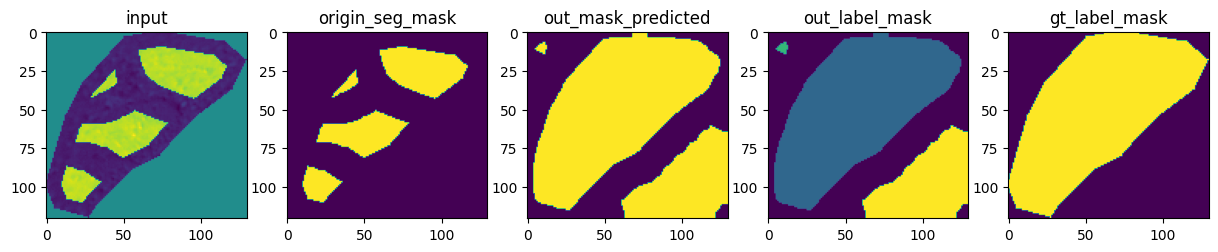

In [8]:
import skimage.measure
import random
out_threshold = OUT_THRESHOLD
# idx = 0
# randomly select an index
idx = random.randint(0, len(train_dataset) - 1)
sample = train_dataset[idx]
origin_idx = train_dataset.indices[idx]
gt_label_mask = dataset.get_gt_label_mask(origin_idx)
original_input_mask = sample["seg_mask"].numpy().squeeze()
original_input_mask = original_input_mask.astype(bool)
print("original_input_mask.shape", original_input_mask.shape)

out_mask = model(sample["input"].unsqueeze(0).cuda())
out_mask = out_mask[0].cpu().detach().numpy()
print("out_mask shape", out_mask.shape)
out_mask_predicted = out_mask[0] > out_threshold
# out_mask_predicted[original_input_mask < 0.5] = 0
out_mask_predicted = out_mask_predicted.astype(bool)

out_label_mask = skimage.measure.label(out_mask_predicted)

fig, axes = plt.subplots(1, 5, figsize=(15, 5))
ax = axes[0]
ax.set_title("input")
ax.imshow(sample["input"][0])
ax = axes[1]
ax.set_title("origin_seg_mask")
ax.imshow(sample["seg_mask"])
ax = axes[2]
ax.set_title("out_mask_predicted")
ax.imshow(out_mask_predicted)
ax = axes[3]
ax.set_title("out_label_mask")
ax.imshow(out_label_mask)
ax = axes[4]
ax.set_title("gt_label_mask")
ax.imshow(gt_label_mask)

match_label_mask_by_iou(out_label_mask, gt_label_mask, match_threshold=0.8)


### Check the real underseg cases

In [9]:
set(test_df["subdir"])

{'real_underseg_cases', 'synthetic_overseg', 'synthetic_underseg_overlap'}

In [10]:
real_underseg_test_df = test_df[test_df["subdir"] == "real_underseg_cases"]
print("# real underseg test samples", len(real_underseg_test_df))
real_underseg_test_df[:2]   

# real underseg test samples 70


raw  \
5040  notebook_results/a549_ccp_vim/test_data_v6/rea...   
5041  notebook_results/a549_ccp_vim/test_data_v6/rea...   

                                                    seg  \
5040  notebook_results/a549_ccp_vim/test_data_v6/rea...   
5041  notebook_results/a549_ccp_vim/test_data_v6/rea...   

                                                     gt  \
5040  notebook_results/a549_ccp_vim/test_data_v6/rea...   
5041  notebook_results/a549_ccp_vim/test_data_v6/rea...   

                                                raw_seg     scale  \
5040  notebook_results/a549_ccp_vim/test_data_v6/rea...  0.000000   
5041  notebook_results/a549_ccp_vim/test_data_v6/rea...  0.033333   

                                          aug_diff_mask  \
5040  notebook_results/a549_ccp_vim/test_data_v6/rea...   
5041  notebook_results/a549_ccp_vim/test_data_v6/rea...   

                                          gt_label_mask  \
5040  notebook_results/a549_ccp_vim/test_data_v6/rea...   
5041  notebook_results/a549_ccp_vim/test_data_v6/rea...   

                                    raw_transformed_img               subdir  
5040  notebook_results/a549_ccp_vim/test_data_v6/rea...  real_underseg_cases  
5041  notebook_results/a549_ccp_vim/test_data_v6/rea...  real_underseg_cases

In [11]:
real_underseg_test_dataset = assemble_dataset(
        real_underseg_test_df,
        apply_gt_seg_edt=model.apply_gt_seg_edt,
        exclude_raw_input_bg=model.exclude_raw_input_bg,
        input_type=model.input_type,
)

input type: raw_aug_duplicate
if apply_gt_seg_edt: False


In [12]:
real_underseg_test_dataset.exclude_raw_input_bg

False

In [13]:
real_underseg_test_dataset.input_type

'raw_aug_duplicate'

In [14]:
real_underseg_test_dataset.exclude_raw_input_bg = True

In [15]:
len(real_underseg_test_dataset)

70

In [16]:
underseg_test_metrics = {}
for i, sample in enumerate(tqdm.tqdm(real_underseg_test_dataset)):
    # print(sample.keys())
    gt_label_mask = real_underseg_test_dataset.get_gt_label_mask(i)
    single_sample_metrics = evaluate_sample_v3_underseg(sample, model, out_threshold=OUT_THRESHOLD, gt_label_mask=gt_label_mask)
    for metric, value in single_sample_metrics.items():
        if metric not in underseg_test_metrics:
            underseg_test_metrics[metric] = []
        underseg_test_metrics[metric].append(value)

for key in underseg_test_metrics:
    underseg_test_metrics[key] = np.array(underseg_test_metrics[key])

100%|██████████| 70/70 [00:03<00:00, 18.82it/s]


In [17]:
data = {
    "csn" : underseg_test_metrics["out_mask_accuracy"],
    "original" : underseg_test_metrics["original_mask_accuracy"],
}
print("csn mean:", np.mean(data["csn"]))
print("csn std:", np.std(data["csn"]))
print("original mean:", np.mean(data["original"]))
print("original std:", np.std(data["original"]))

csn mean: 0.9554801552334559
csn std: 0.010262659846729399
original mean: 0.9543881237378041
original std: 0.018540556427368904


In [18]:
real_underseg_test_dataset.exclude_raw_input_bg = True

In [19]:
for i, sample in enumerate(real_underseg_test_dataset):
    # print("sample shape", sample["input"].shape)
    input = sample["input"].unsqueeze(0)
    img = input[0].numpy()[0]
    
    # show distribution of img
    # plt.hist(img.flatten(), bins=100)
    # print("img < 0:", np.sum(img < 0))
    # plt.show()
    # plt.imshow(img)
    # plt.show()
    # img[img <= 0] = 0
    # plt.imshow(img)
    # plt.show()
    break

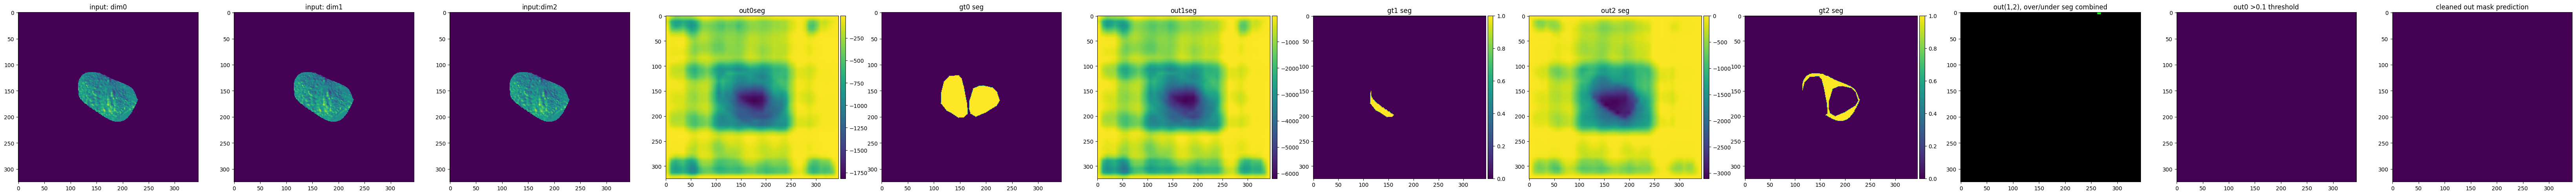

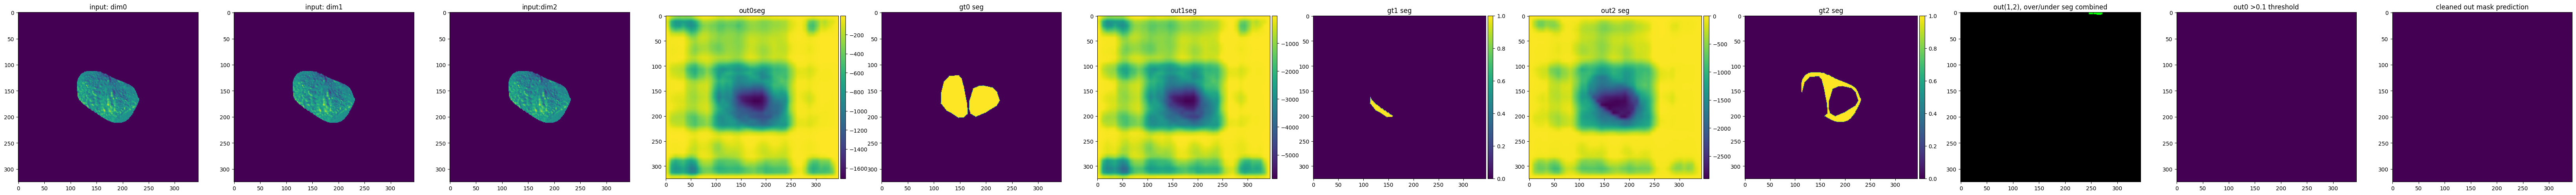

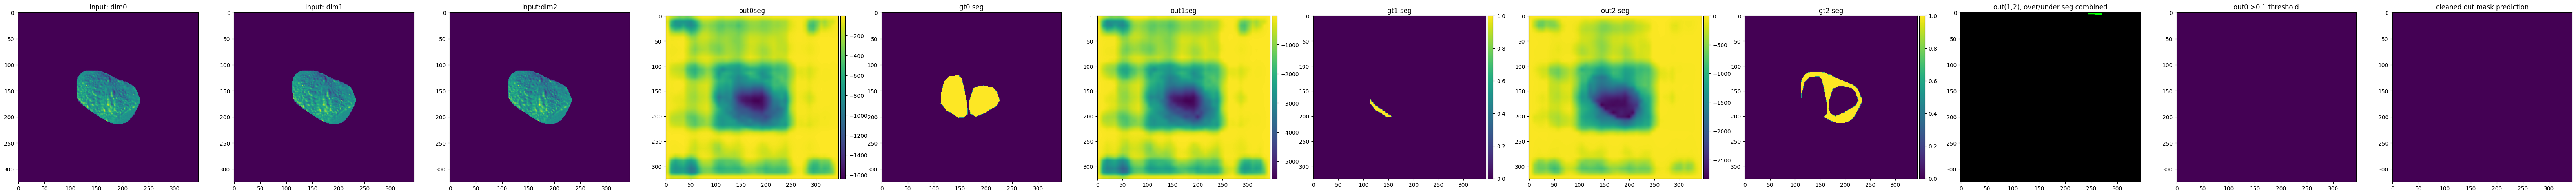

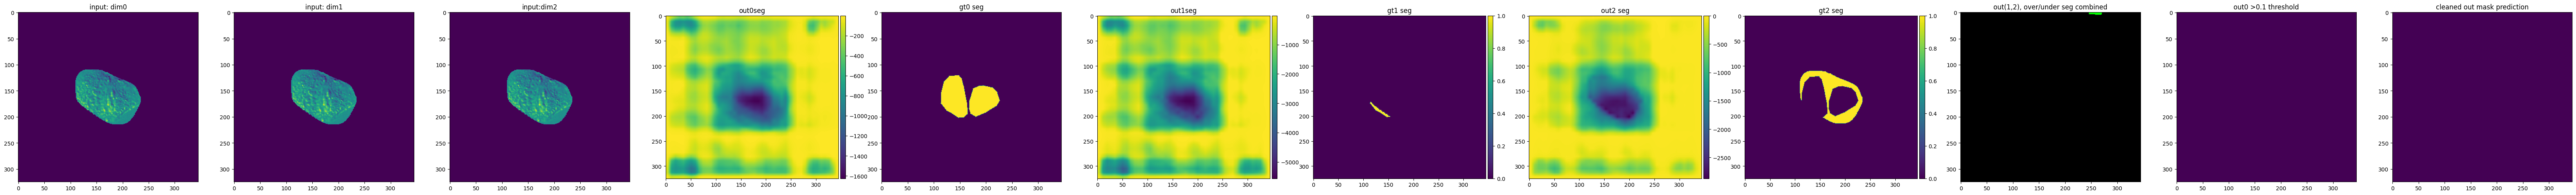

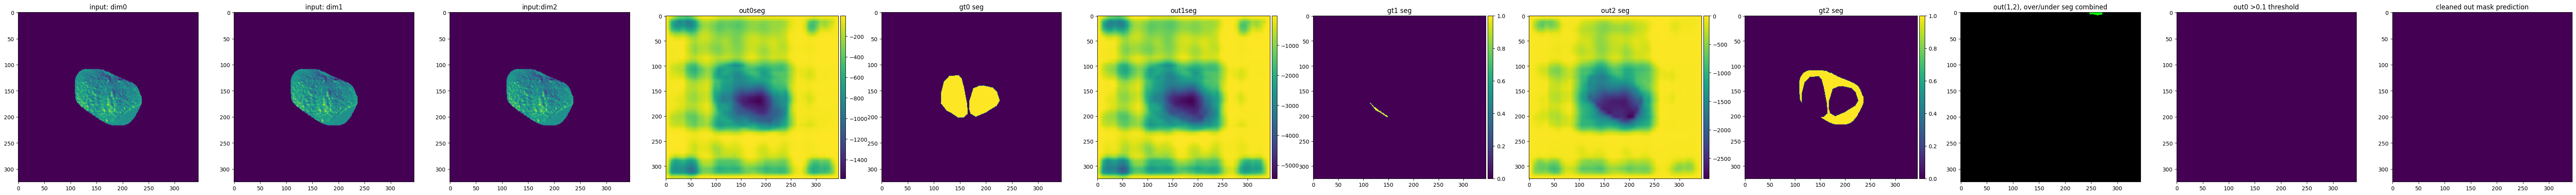

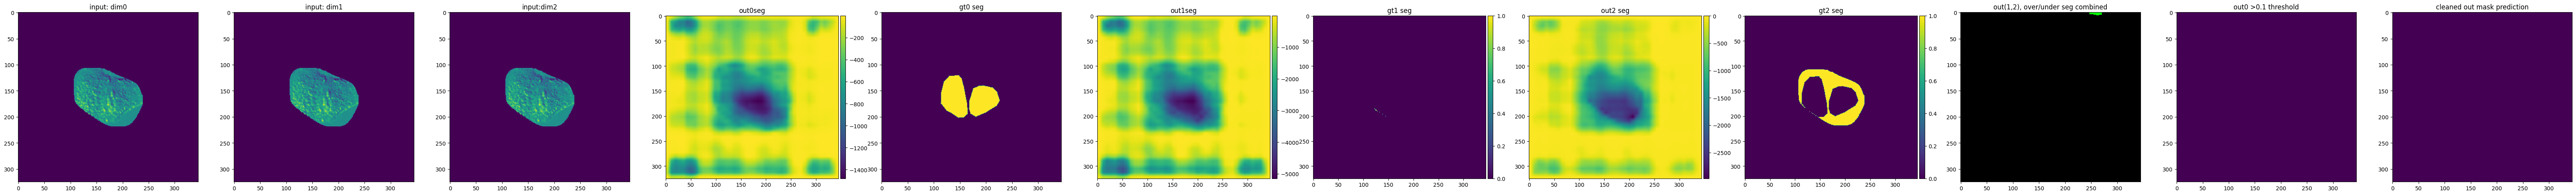

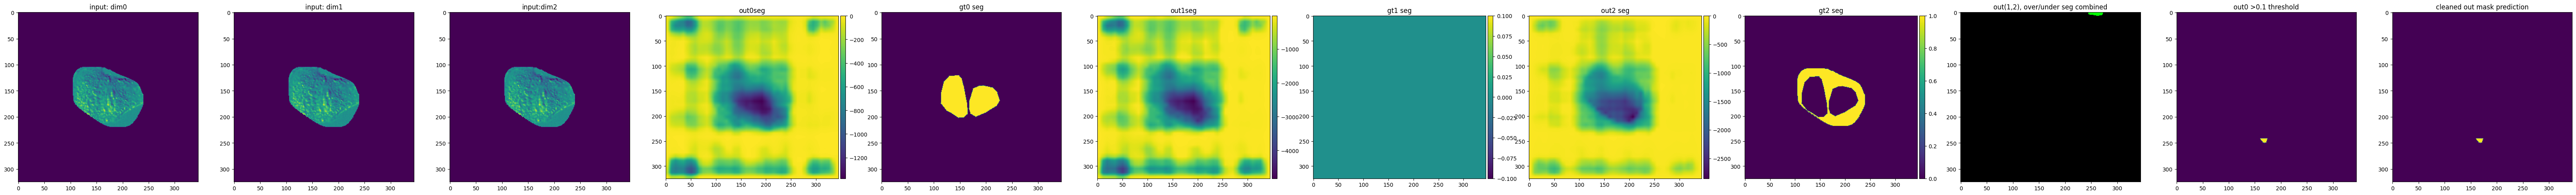

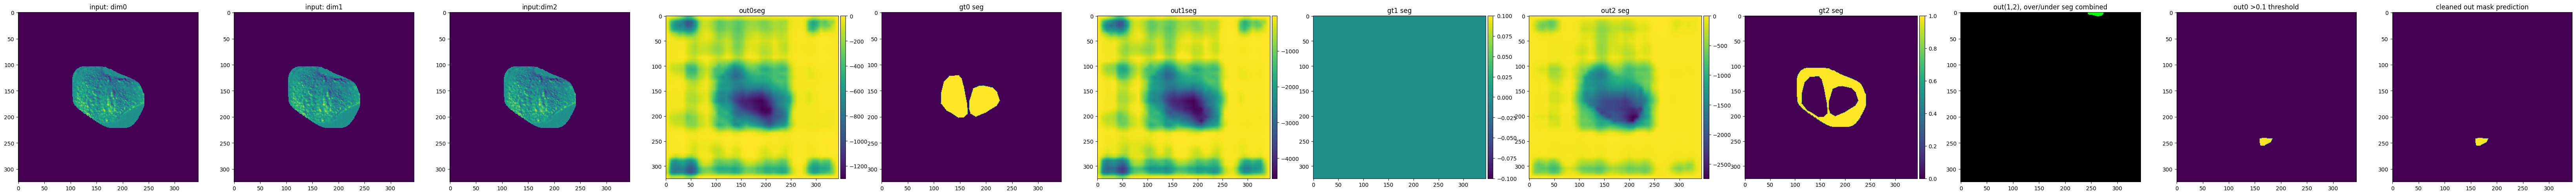

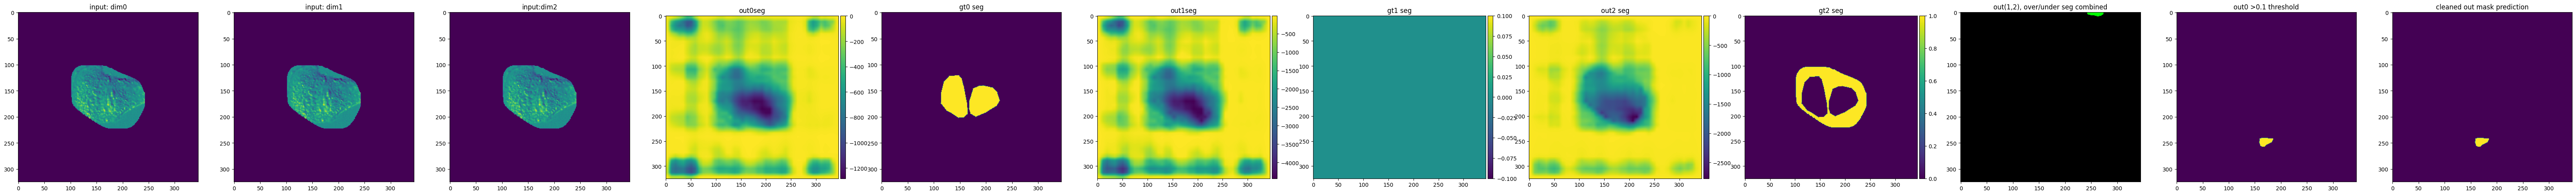

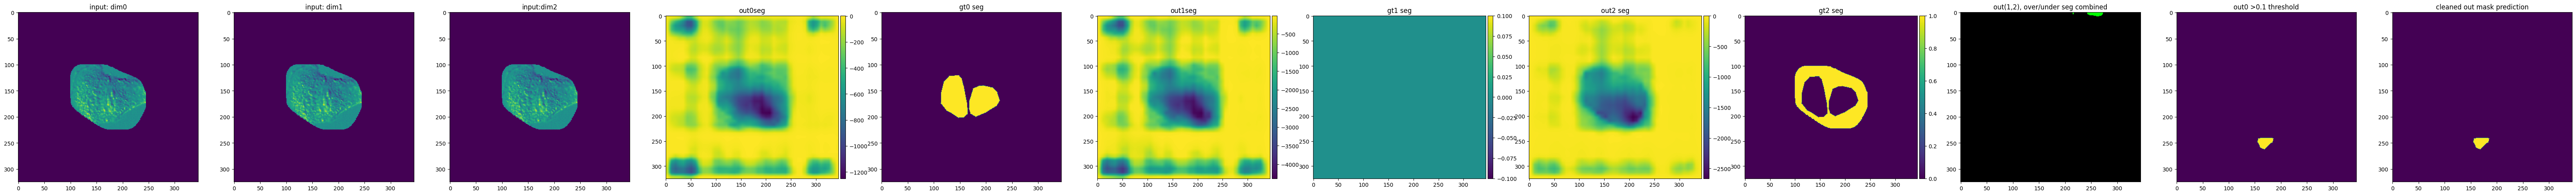

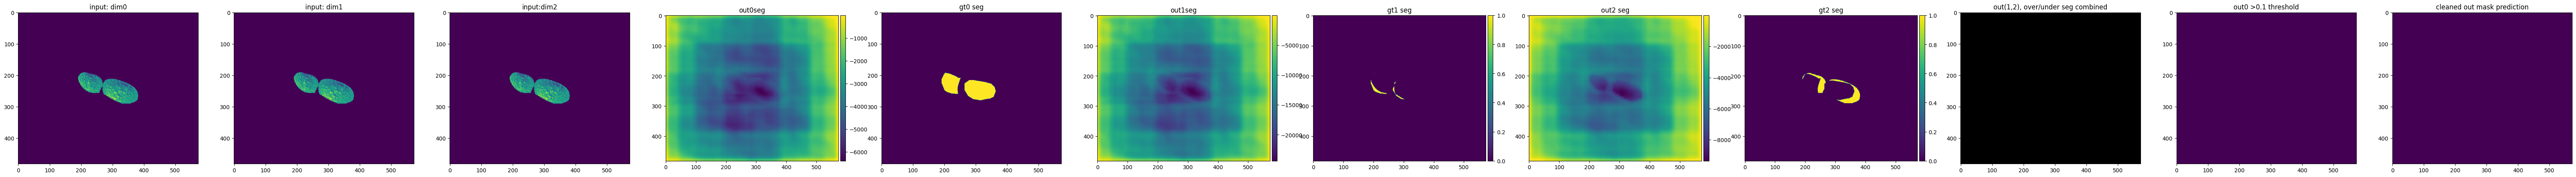

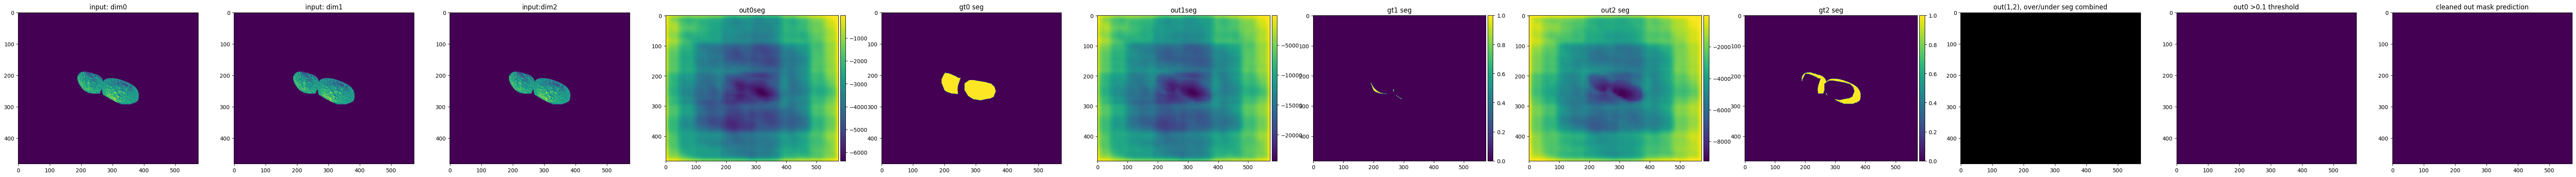

In [34]:
warnings.filterwarnings("ignore")
from livecell_tracker.model_zoo.segmentation.eval_csn import viz_sample_v3
for i, sample in enumerate(real_underseg_test_dataset):
    # print(sample.keys())
    # plt.imshow(sample["input"][1])
    # plt.show()

    # # print stats of sample input
    # print("sample input min", np.min(sample["input"][0].cpu().numpy()))
    # print("sample input max", np.max(sample["input"][0].cpu().numpy()))
    # print("sample input mean", np.mean(sample["input"][0].cpu().numpy()))
    # print("sample input std", np.std(sample["input"][0].cpu().numpy()))
    
    viz_sample_v3(sample, model, out_threshold=0.1) # OUT_THRESHOLD)
    if i > 10:
        break
warnings.filterwarnings("default")

### On Testing Dataset

In [21]:
import tqdm
test_metrics = {}
for i, sample in tqdm.tqdm(enumerate(test_dataset)):
    # print(sample.keys())
    gt_label_mask = test_dataset.get_gt_label_mask(i)
    single_sample_metrics = evaluate_sample_v3_underseg(sample, model, out_threshold=OUT_THRESHOLD, gt_label_mask=gt_label_mask)
    

    for metric, value in single_sample_metrics.items():
        if metric not in test_metrics:
            test_metrics[metric] = []
        test_metrics[metric].append(value)

for key in test_metrics:
    test_metrics[key] = np.array(test_metrics[key])

8980it [02:50, 52.55it/s]


csn mean: 0.5106822924256496
csn std: 0.12284590850613639
original mean: 0.7798826807752328
original std: 0.17354638950015971


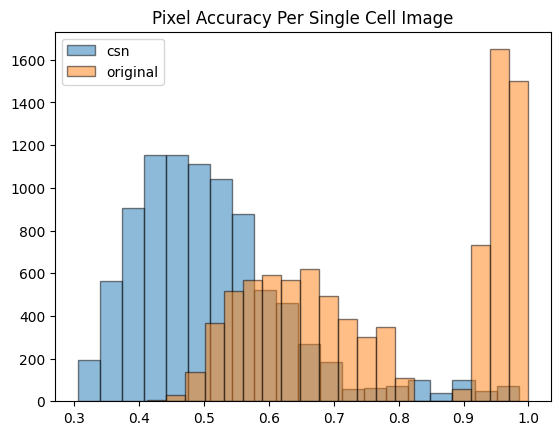

In [22]:
import seaborn as sns
data = {
    "csn" : test_metrics["out_mask_accuracy"],
    "original" : test_metrics["original_mask_accuracy"],
}
print("csn mean:", np.mean(data["csn"]))
print("csn std:", np.std(data["csn"]))
print("original mean:", np.mean(data["original"]))
print("original std:", np.std(data["original"]))
bins = 20
plt.hist(data["csn"], bins=bins, alpha=0.5, label="csn", edgecolor='black', linewidth=1)
plt.hist(data["original"], bins=bins, alpha=0.5, label="original", edgecolor='black', linewidth=1)
plt.title("Pixel Accuracy Per Single Cell Image")
plt.legend()

csn mean: 0.32648027407239416
csn std: 0.10315217661034524
original mean: 0.6612134910042116
original std: 0.20130659624398733


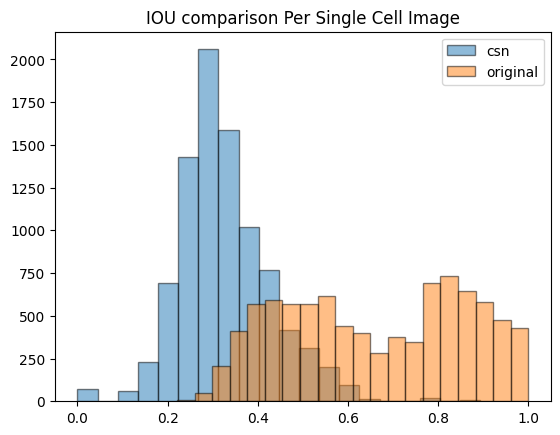

In [23]:
data = {
    "csn" : test_metrics["out_mask_iou"],
    "original" : test_metrics["original_mask_iou"],
}
print("csn mean:", np.mean(data["csn"]))
print("csn std:", np.std(data["csn"]))
print("original mean:", np.mean(data["original"]))
print("original std:", np.std(data["original"]))
bins = 20
plt.hist(data["csn"], bins=bins, alpha=0.5, label="csn", edgecolor='black', linewidth=1)
plt.hist(data["original"], bins=bins, alpha=0.5, label="original", edgecolor='black', linewidth=1)
plt.title("IOU comparison Per Single Cell Image")
plt.legend()

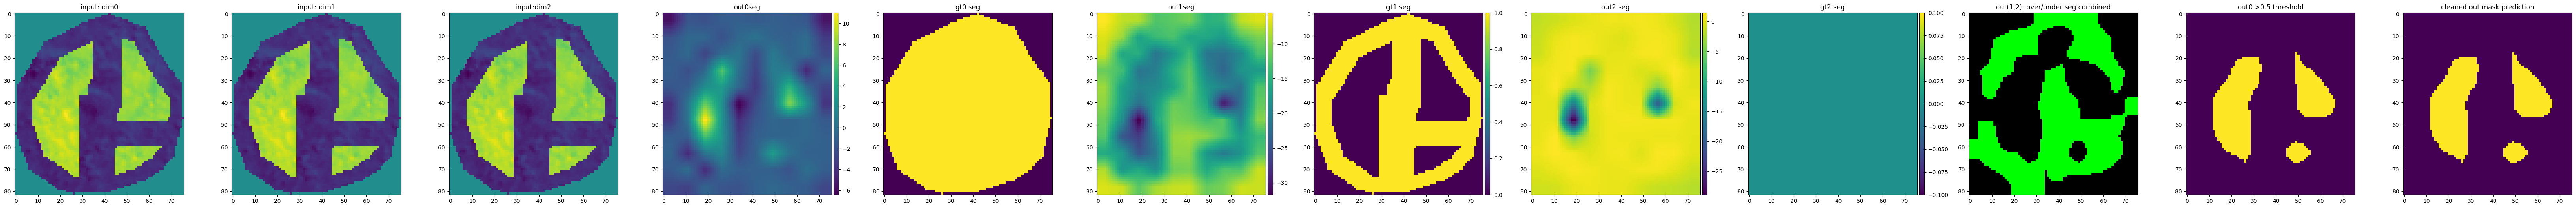

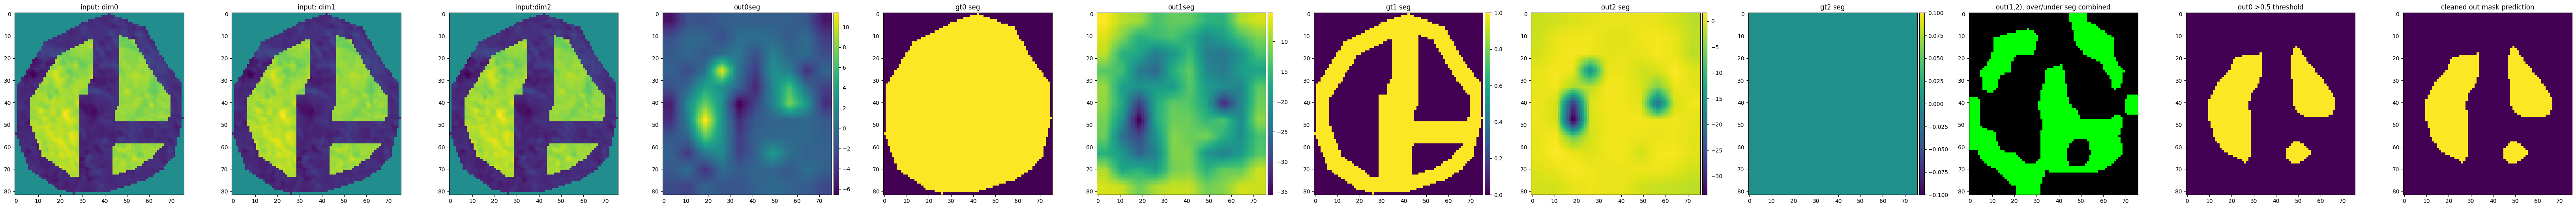

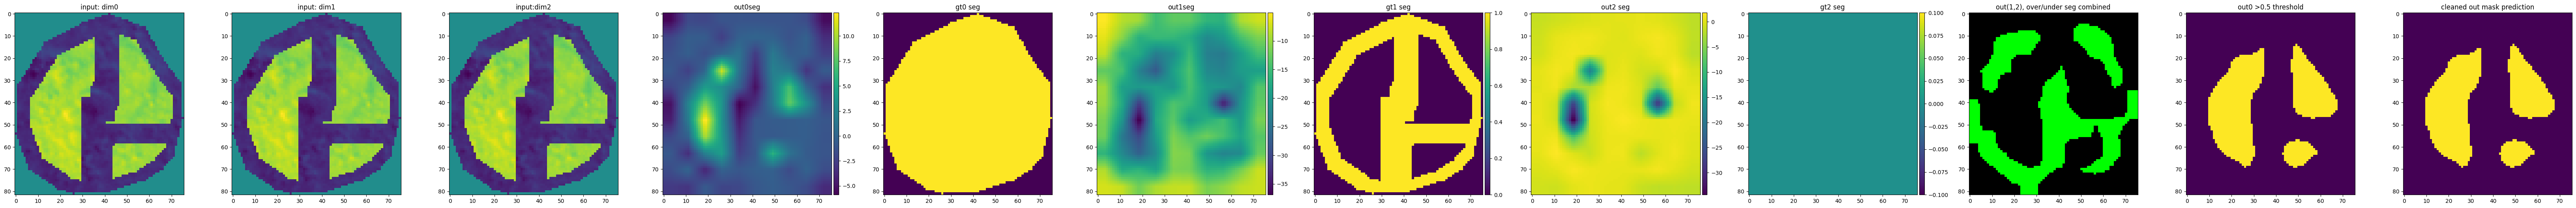

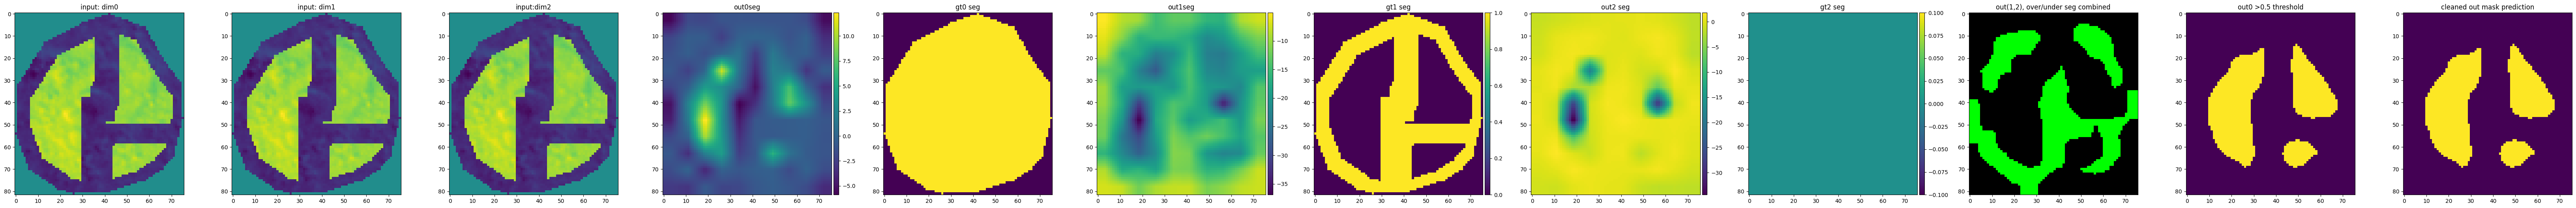

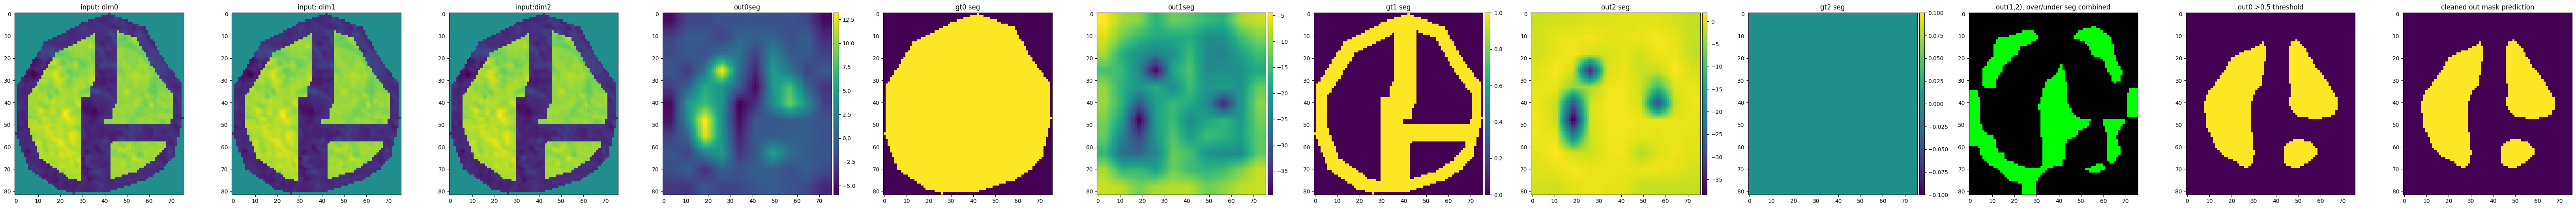

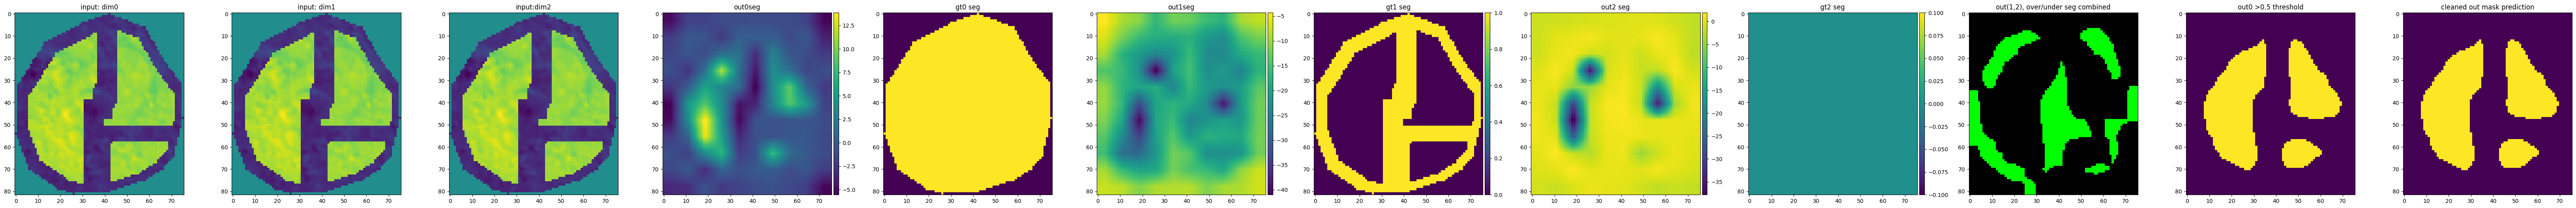

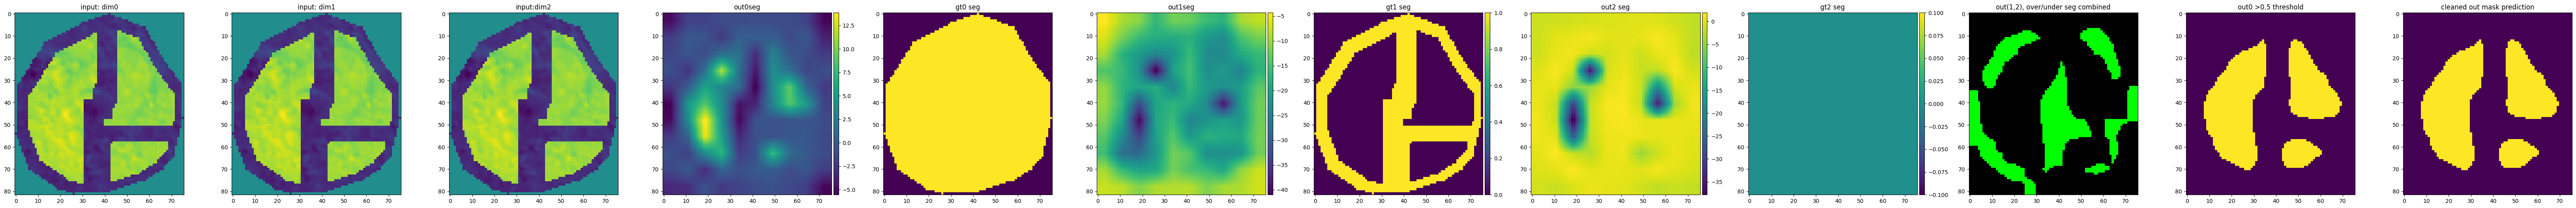

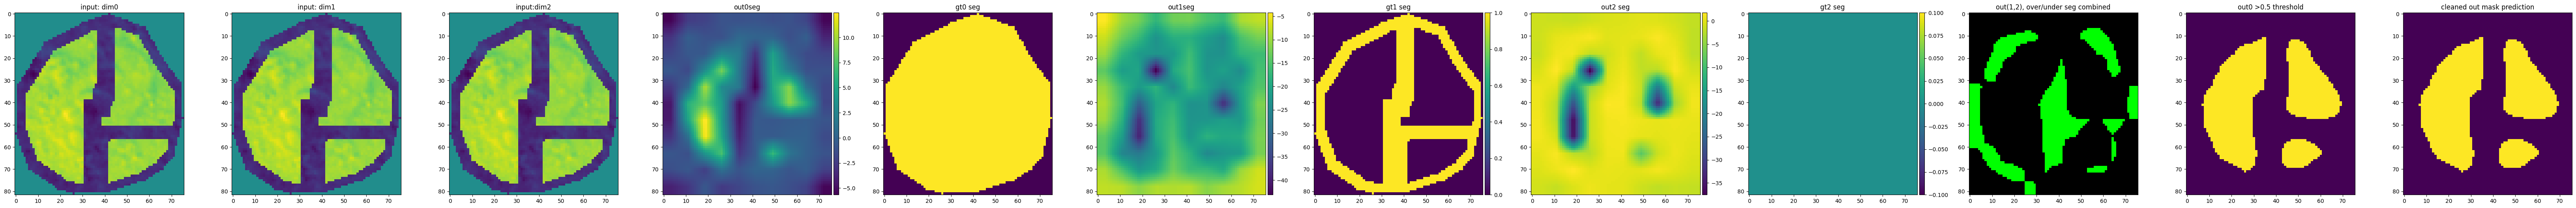

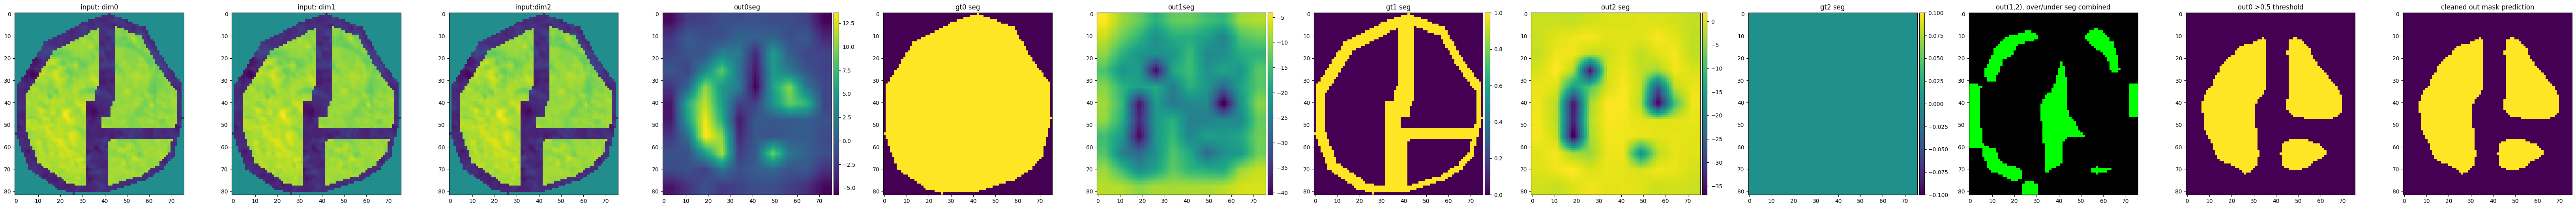

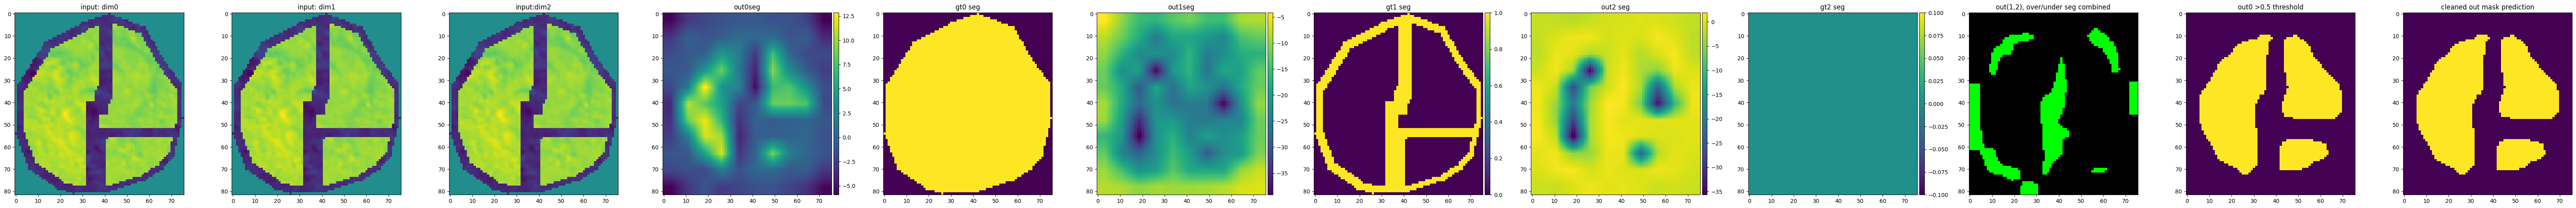

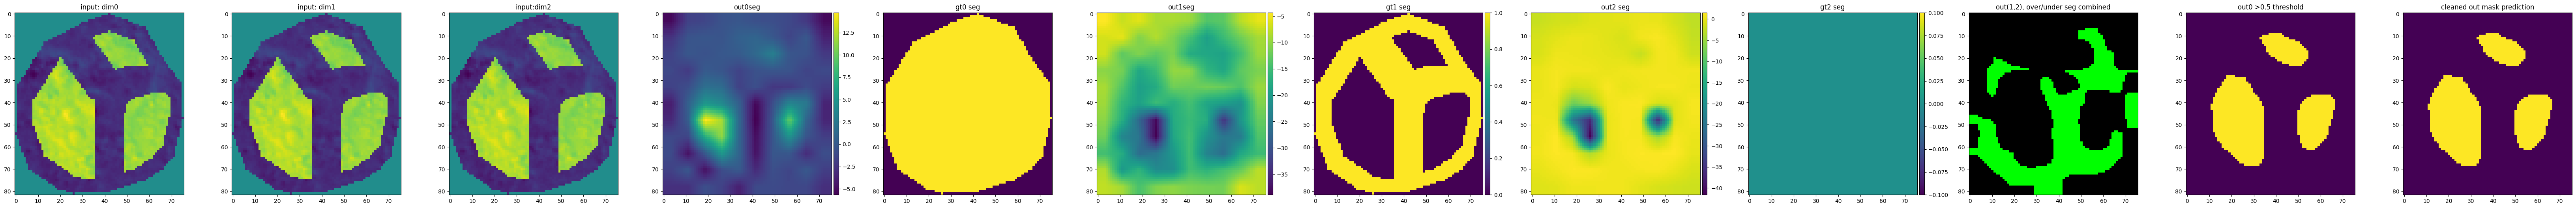

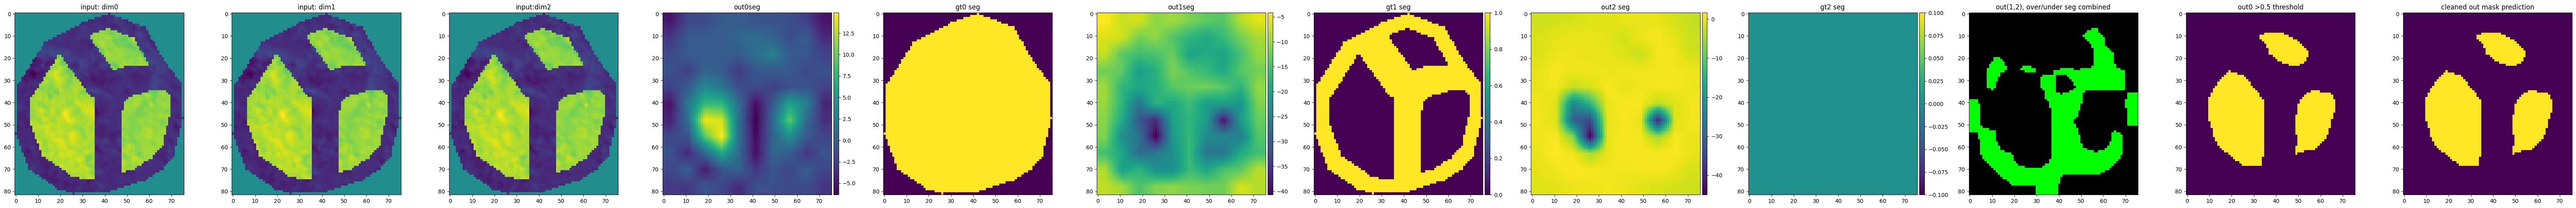

In [24]:
for i, sample in enumerate(test_dataset):
    viz_sample_v3(sample, model, out_threshold=OUT_THRESHOLD)
    if i > 10:
        break
warnings.filterwarnings("default")

### Evaluate on training dataset

In [25]:
import tqdm
train_metrics = {}
for i, sample in enumerate(tqdm.tqdm((train_dataset))):
    # print(sample.keys())
    origin_idx = train_dataset.indices[i]
    gt_label_mask = dataset.get_gt_label_mask(origin_idx)
    single_sample_metrics = evaluate_sample_v3_underseg(sample, model, out_threshold=OUT_THRESHOLD, gt_label_mask=gt_label_mask)
    for metric, value in single_sample_metrics.items():
        if metric not in train_metrics:
            train_metrics[metric] = []
        train_metrics[metric].append(value)

for key in train_metrics:
    train_metrics[key] = np.array(train_metrics[key])

  1%|          | 454/73208 [00:11<31:42, 38.24it/s] 


KeyboardInterrupt: 

In [ ]:
import seaborn as sns
data = {
    "csn" : train_metrics["out_mask_accuracy"],
    "original" : train_metrics["original_mask_accuracy"],
}
print("csn mean:", np.mean(data["csn"]))
print("csn std:", np.std(data["csn"]))
print("original mean:", np.mean(data["original"]))
print("original std:", np.std(data["original"]))
bins = 20
plt.hist(data["csn"], bins=bins, alpha=0.5, label="csn", edgecolor='black', linewidth=1)
plt.hist(data["original"], bins=bins, alpha=0.5, label="original", edgecolor='black', linewidth=1)
plt.title("Pixel Accuracy Per Single Cell Image")
plt.legend()

In [ ]:
data = {
    "csn" : train_metrics["out_mask_iou"],
    "original" : train_metrics["original_mask_iou"],
}
print("csn mean:", np.mean(data["csn"]))
print("csn std:", np.std(data["csn"]))
print("original mean:", np.mean(data["original"]))
print("original std:", np.std(data["original"]))
bins = 20
plt.hist(data["csn"], bins=bins, alpha=0.5, label="csn", edgecolor='black', linewidth=1)
plt.hist(data["original"], bins=bins, alpha=0.5, label="original", edgecolor='black', linewidth=1)
plt.title("IOU comparison Per Single Cell Image")
plt.legend()

### Visualize Results

In [ ]:
def check_sample_result(idx, model, dataset: CorrectSegNetDataset):
    sample = dataset[idx]
    check_sample_v1(sample, model, raw_seg=dataset.get_raw_seg(idx), scale=dataset.get_scale(idx))


def check_sample_v1(sample: dict, model, raw_seg=None, scale=None):
    out_mask = model(sample["input"].unsqueeze(0).cuda())
    out_mask = out_mask[0].argmax(0).cpu().numpy()
    fig, axes = plt.subplots(1, 5, figsize=(25, 5))
    axes[0].imshow(sample["input"][0])
    axes[0].set_title("raw")

    axes[1].imshow(sample["input"][1])
    axes[1].set_title("augmented seg, scale: {:.2f}".format(scale if scale is not None else float("inf")))

    axes[2].imshow(out_mask)
    axes[2].set_title("predicted seg")

    axes[3].imshow(sample["gt_mask"].numpy().squeeze())
    axes[3].set_title("gt seg")

    if raw_seg is not None:
        axes[4].imshow(raw_seg)
        axes[4].set_title("raw seg")

from mpl_toolkits.axes_grid1 import make_axes_locatable
def add_colorbar(im, ax, fig):
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='3%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

def check_sample_v3(sample: dict, model, raw_seg=None, scale=None, out_threshold=OUT_THRESHOLD):
    out_mask = model(sample["input"].unsqueeze(0).cuda())
    original_input_mask = sample["input"].numpy().squeeze()[2]
    original_input_mask = original_input_mask.astype(bool)

    gt_mask = sample["gt_mask"].numpy().squeeze()
    out_mask = out_mask[0].cpu().detach().numpy()
    fig, axes = plt.subplots(1, 12, figsize=(12 * 7, 6))
    axes[0].imshow(sample["input"][0])
    axes[0].set_title("raw")

    axes[1].imshow(sample["input"][1])
    axes[1].set_title("augmented seg, scale: {:.2f}".format(scale if scale is not None else float("inf")))
    im2 = axes[2].imshow(out_mask[0, :])
    axes[2].set_title("out0seg")
    add_colorbar(im2, axes[2], fig)

    axes[3].imshow(gt_mask[0, :])
    axes[3].set_title("gt0 seg")

    im4 = axes[4].imshow(out_mask[1, :])
    axes[4].set_title("out1seg")
    add_colorbar(im4, axes[4], fig)
    
    im5 = axes[5].imshow(gt_mask[1, :])
    add_colorbar(im5, axes[5], fig)
    axes[5].set_title("gt1 seg")

    im6 = axes[6].imshow(out_mask[2, :])
    add_colorbar(im6, axes[6], fig)
    axes[6].set_title("out2 seg")

    im7 = axes[7].imshow(gt_mask[2, :])
    add_colorbar(im7, axes[7], fig)
    axes[7].set_title("gt2 seg")


    combined_over_under_seg = np.zeros([3] + list(out_mask.shape[1:]))
    combined_over_under_seg[0, out_mask[1, :] > out_threshold] = 1
    combined_over_under_seg[1, out_mask[2, :] > out_threshold] = 1
    im = axes[8].imshow(np.moveaxis(combined_over_under_seg, 0, 2))
    axes[8].set_title("out(1,2), over/under seg combined")

    # import matplotlib.patches as mpatches
    # values = [-1, 0, 1]
    # colors = [im.cmap(im.norm(value)) for value in values]
    # patches = [mpatches.Patch(color=colors[i], label="Level {l}".format(l=values[i]) ) for i in range(len(values))]
    # axes[8].legend(handles=patches, loc=2, borderaxespad=0. )
   

    axes[9].imshow(out_mask[0] > out_threshold)
    axes[9].set_title(f"out0 >{out_threshold} threshold")


    out_mask_predicted = out_mask[0] > out_threshold
    # ignore pixels outside an area, only works for undersegmentation
    out_mask_predicted[original_input_mask < 0.5] = 0
    out_mask_predicted = out_mask_predicted.astype(bool)
    axes[10].imshow(out_mask_predicted)
    axes[10].set_title(f"cleaned out mask prediction")

    axes[11].imshow(sample["input"][2])
    axes[11].set_title("input:dim2")
    # # visualize out specifically
    # fig, axes = plt.subplots(1, 3, figsize=(25, 5))
    # axes[0].imshow(out_mask[1] > out_threshold)
    # axes[0].set_title(f"out1 >{out_threshold} threshold")
    # axes[1].imshow(out_mask[2] > out_threshold)
    # axes[1].set_title(f"out2 >{out_threshold} threshold")
    
    # combined_over_under_seg = np.zeros([3] + list(out_mask.shape[1:]))
    # combined_over_under_seg[0, out_mask[1, :] > 2] = 1
    # combined_over_under_seg[1, out_mask[2, :] > 2] = 1
    # axes[2].imshow(np.moveaxis(combined_over_under_seg, 0, 2))
    # axes[2].set_title("out(1,2), over/under seg combined")

    # print("g1 seg stats:", gt_mask[1, :].mean(), gt_mask[1, :].std(), np.unique(gt_mask.flatten()))


visualize test results

In [ ]:
import warnings
warnings.filterwarnings("ignore")
for i, sample in enumerate(test_dataset):
    # print(sample.keys())
    check_sample_v3(sample, model, out_threshold=OUT_THRESHOLD)
    if i > 10:
        break
warnings.filterwarnings("default")

visualize training image results

In [ ]:
import warnings
warnings.filterwarnings("ignore")
for i, sample in enumerate(train_dataset):
    # print(sample.keys())
    check_sample_v3(sample, model, out_threshold=OUT_THRESHOLD)
    if i > 10:
        break
warnings.filterwarnings("default")

Validation set
```
for i in range(len(model.val_dataset)):
    sample = model.val_dataset[i]
    check_sample_result(sample, model)
```

## Shift the cell to edge to check if the model only focuses on center area

In [ ]:
chosen_sample = dataset[9]
# plt.imshow(chosen_sample["input"][0])

In [ ]:
shift_sample = {}
shift_dist = 20
shift_sample["input"] = chosen_sample["input"][:, :-shift_dist, :-shift_dist]
# # for v1, single mask prediction
# shift_sample["gt_mask"] = chosen_sample["gt_mask"][0, :-150, :-150]

shift_sample["gt_mask"] = chosen_sample["gt_mask"][:, :-shift_dist, :-shift_dist]

In [ ]:
shift_sample["input"].shape, shift_sample["gt_mask"].shape

In [ ]:
# check_sample_v1(shift_sample, model)
check_sample_v3(shift_sample, model, out_threshold=OUT_THRESHOLD)

In [ ]:
test_dataset = assemble_dataset(test_df)
for i, sample in enumerate(test_dataset):
    # print(sample.keys())
    check_sample_v3(sample, model, out_threshold=OUT_THRESHOLD)
    if i > 50:
        break